In [1]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
from random import shuffle
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras import models, datasets, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, load_model

In [ ]:
### do not run ###
# makes all the new directories
for dir_name in os.listdir('/content/drive/MyDrive/Coding/Q3_Project/face_images'):
  os.makedirs(f'/content/drive/MyDrive/Coding/Q3_Project/gray_face_images/{dir_name}')


In [ ]:
### do not run ###
# converts all images into grayscale and saves them
for dir_name in os.listdir('/content/drive/MyDrive/Coding/Q3_Project/face_images'):
  for img_path in os.listdir(f'/content/drive/MyDrive/Coding/Q3_Project/face_images/{dir_name}'):
      img = open(f'/content/drive/MyDrive/Coding/Q3_Project/face_images/{dir_name}/{img_path}')
      img = cv2.imdecode(np.fromfile(img, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      cv2.imwrite(f'/content/drive/MyDrive/Coding/Q3_Project/gray_face_images/{dir_name}/{img_path}', gray)


In [ ]:
### do not run ###
# renames the photos in the directory
for dir_name in os.listdir('/content/drive/MyDrive/Coding/Q3_Project/gray_face_images'):
  img_id = 0
  for img_path in os.listdir(f'/content/drive/MyDrive/Coding/Q3_Project/gray_face_images/{dir_name}'):
    new_path = f'/content/drive/MyDrive/Coding/Q3_Project/gray_face_images/{dir_name}/{dir_name}_{img_id}.jpg'
    old_path = f'/content/drive/MyDrive/Coding/Q3_Project/gray_face_images/{dir_name}/{img_path}'
    img = open(old_path)
    img = cv2.imdecode(np.fromfile(img, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
    cv2.imwrite(new_path, img)
    os.remove(old_path)
    img_id += 1

In [ ]:
### do not run ###
## makes the images just the faces
people =['Robert Downey Jr', 'Chris Hemsworth', 'Scarlett Johannson', 'Chris Evans', 'Mark Ruffalo', 'Elizabeth Olsen', 'Jermey Renner']

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

for person in people:
  for path in os.listdir(f'/content/drive/MyDrive/Coding/Q3_Project/full_images/{person}'):

    img = cv2.imdecode(np.fromfile(f'/content/drive/MyDrive/Coding/Q3_Project/full_images/{person}/{path}', dtype=np.uint8), cv2.IMREAD_UNCHANGED)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
      x-=5
      y-=10
      w+=20
      h+=30
      face = img[y:y + h, x:x + w]
      face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
      face = Image.fromarray(face)

      face.save(f'''/content/drive/MyDrive/Coding/Q3_Project/face_images/{person}/{path}''')

In [5]:
def create_label(image_name):
  name = image_name.split('.')
  name = name[0].split('_')
  name = name[0]

  if name == 'Chris Evans':
    return np.array([1,0,0,0,0,0,0])
  if name == 'Chris Hemsworth':
    return np.array([0,1,0,0,0,0,0])
  if name == 'Elizabeth Olsen':
    return np.array([0,0,1,0,0,0,0])
  if name == 'Jermey Renner':
    return np.array([0,0,0,1,0,0,0])
  if name == 'Mark Ruffalo':
    return np.array([0,0,0,0,1,0,0])
  if name == 'Robert Downey Jr':
    return np.array([0,0,0,0,0,1,0])
  if name == 'Scarlett Johannson':
    return np.array([0,0,0,0,0,0,1])

In [11]:
shape = 128
# size of the images L=shape W=shape

In [ ]:
# creates the data set
def create_data():
  data = []
  for dir_name in os.listdir('/content/drive/MyDrive/Coding/Q3_Project/gray_face_images'):
    for img_path in tqdm(os.listdir(f'/content/drive/MyDrive/Coding/Q3_Project/gray_face_images/{dir_name}')):
      path = f'/content/drive/MyDrive/Coding/Q3_Project/gray_face_images/{dir_name}/{img_path}'
      # img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
      # if you are using not already using gray scale images
      img = open(path)
      img = cv2.imdecode(np.fromfile(img, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
      img_data = cv2.resize(img, (shape, shape))
      data.append([np.array(img_data), create_label(img_path)])
  shuffle(data)
  # randomizes the order of the data
  return data

In [ ]:
data = create_data()
# generates the dataset

100%|██████████| 78/78 [00:21<00:00,  3.67it/s]


In [ ]:
train = data[:315]
test = data[315:]
# splits the data in half

X_train = np.array([i[0] for i in train]).reshape(-1, shape, shape, 1)
y_train = [i[1] for i in train]
# creates the training data

X_test = np.array([i[0] for i in test]).reshape(-1, shape, shape, 1)
y_test = [i[1] for i in test]
# creates the testing data

In [ ]:
model = models.Sequential()
# makes a neural network where layers can be easily added

# relu is a function that helps for deep learning by fixing the issues with gradient descent
# conv2d are convolutional layers that are used for noticing patterns in data
# first number is how many filters will be drawn out across the images
# the tuple is how many pixels will be in the layer so a (5, 5) is a 5 pixel by 5 pixel filter
# padding is the same so that the image size is kept consistent across the model
# a max pooling layer will just search the (5,5) pool and will calculate the maximum values inside of it
# by increasing the number of filters as the layers go up and then dropping it down we can get better results

# first layer
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(shape, shape, 1)))
model.add(MaxPooling2D(pool_size=(5, 5), padding='same'))


#second layer
model.add(layers.Conv2D(64, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(5, 5), padding='same'))

# third layer
model.add(layers.Conv2D(128, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(5, 5), padding='same'))

# fourth layer
model.add(layers.Conv2D(64, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(5, 5), padding='same'))

# fith layer
model.add(layers.Conv2D(32, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(5, 5), padding='same'))

# sixth layer
model.add(layers.Flatten())
# converts the multi dimensional array into a single dimension array allowing it to be processed


# seventh layer
model.add(layers.Dense(1024, activation='relu'))
# number stands for how many nerons will be on the layer
# dense is what actually allows us to classify who is in the image

# eigth layer
model.add(layers.Dropout(0.8))
# dropout layer helps to decrease the chance of overfitting in the model

# nineth layer
model.add(layers.Dense(7, activation='softmax'))
# want final dense layer to have the same number of neurons as classes so we have 7 neurons because we have seven people
# use softmax here because it is a multi class network, assigns decimal probabilities to each class

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# wraps the model together
# adam is the typical and base optimizer used
# use categorical cross entropentropy because the network has multiple classes
# metrics just displays what metrics you would like to track when training

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')
# logs the metric values of the ai
model.fit(X_train, np.array(y_train), 50, epochs=50, validation_data=(X_test, np.array(y_test)), callbacks=[tensorboard_callback])
# trains the AI 50 times

In [ ]:
model.save('/content/drive/MyDrive/Coding/Q3_Project/models/new_model.h5')
# saves the model to my google drive to I can use it without training again

In [7]:
model = load_model('/content/drive/MyDrive/Coding/Q3_Project/models/new_model.h5')
# loads the model from the saved file

In [9]:
def create_visualization_data():
  Vdata = []
  for dir_name in os.listdir('/content/drive/MyDrive/Coding/Q3_Project/gray_face_images'):
    for img_path in tqdm(os.listdir(f'/content/drive/MyDrive/Coding/Q3_Project/gray_face_images/{dir_name}')):
      path = f'/content/drive/MyDrive/Coding/Q3_Project/gray_face_images/{dir_name}/{img_path}'
      # img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
      # if you are using not already using gray scale images
      img = open(path)
      img = cv2.imdecode(np.fromfile(img, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
      img_data = cv2.resize(img, (shape, shape))
      Vdata.append([np.array(img_data), create_label(img_path)])
  shuffle(Vdata)
  # randomizes the data
  return Vdata

In [12]:
Vdata = create_visualization_data()
# creates the visualization data

100%|██████████| 78/78 [00:23<00:00,  3.31it/s]


1/1 [==============================] - 0s 21ms/step


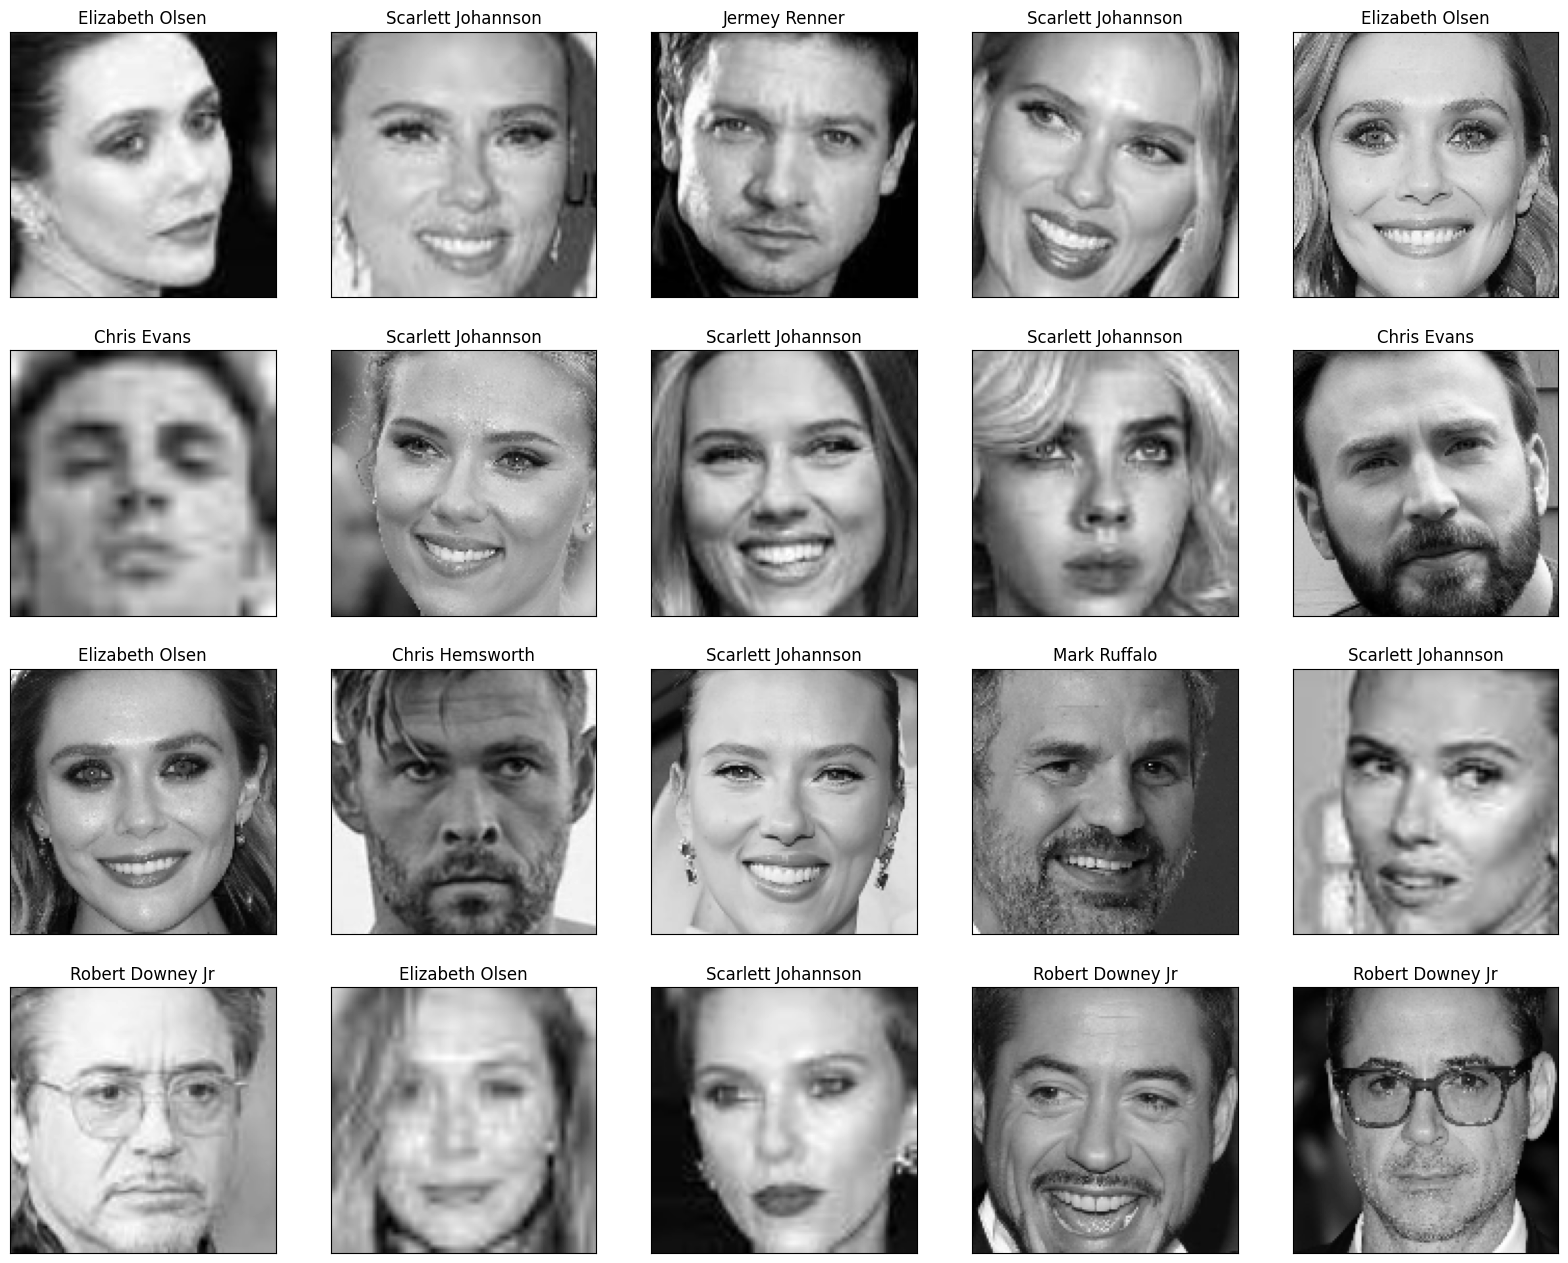

In [13]:
fig = plt.figure(figsize=(20,20))

for num, data in enumerate(Vdata[:20]):
  # shows 20 people and their predictions
  img_data = data[0]
  y = fig.add_subplot(5,5, num+1)
  image = img_data
  data = img_data.reshape(shape, shape, 1)
  # shapes the data
  model_out = model.predict(np.expand_dims(data, 0))
  # makes the prediction

  if np.argmax(model_out) == 0:
    my_label = 'Chris Evans'
  if np.argmax(model_out) == 1:
    my_label = 'Chris Hemsworth'
  if np.argmax(model_out) == 2:
    my_label = 'Elizabeth Olsen'
  if np.argmax(model_out) == 3:
    my_label = 'Jermey Renner'
  if np.argmax(model_out) == 4:
    my_label = 'Mark Ruffalo'
  if np.argmax(model_out) == 5:
    my_label = 'Robert Downey Jr'
  if np.argmax(model_out) == 6:
    my_label = 'Scarlett Johannson'

  y.imshow(image, cmap='gray')
  plt.title(my_label)

  y.axes.get_xaxis().set_visible(False)
  y.axes.get_yaxis().set_visible(False)

plt.show()